In [29]:
import matplotlib.pyplot as plt
import numpy as np

time_averaged = [3.006, 2.542, 2.112, 1.839, 2.773, 1.646, 2.328, 1.965, 1.255]
delta_x = [0.4694, 0.3995, 0.3, 0.1994, 0.4338, 0.149, 0.3536, 0.2493, 0.0975]
num_trials = [20, 20, 20, 20, 5, 5, 5, 5, 5]
time_squared = []
for value in time_averaged:
    time_squared.append(value ** 2)


To test whether or not the accelartion is independant on the distance traveled, we will plot a graph with $\Delta x$ plotted on the x-axis (independant variable), and $T^2$ plotted on the y-axis (dependant variable). If the acceleration is constant, we expect to see linear trend, with the slope being the uniform acceleration. However, before we can plot, we must find the error in our measurements!

The error in any given averaged time measurment will simply be the standard error. To compute the standard error ($\alpha$), we will exploit  $\alpha = \frac{\sigma}{\sqrt{n}}$. So to obtain the standard error for an averaged time value, we will compute the standard deviation of the trial that obtained that average, and then divide that by $\sqrt{n}$.

In [32]:
standard_error_time = []

data_values1 = [
    2.998, 3.039, 3.025, 2.962, 2.98, 2.985, 3.01, 2.999, 3.13, 2.996, 2.996, 3.01, 
    3.098, 2.941, 3.033, 2.978, 2.971, 2.949, 2.997, 3.015, 2.516, 2.535, 2.53, 2.5, 
    2.515, 2.522, 2.447, 2.503, 2.543, 2.549, 2.55, 2.587, 2.532, 2.576, 2.584, 2.57, 
    2.588, 2.56, 2.545, 2.595, 2.108, 2.091, 2.069, 2.097, 2.094, 2.11, 2.091, 2.099, 
    2.088, 2.067, 2.103, 2.111, 2.115, 2.163, 2.116, 2.109, 2.175, 2.096, 2.126, 2.22, 
    1.812, 1.819, 1.796, 1.847, 1.811, 1.9, 1.826, 1.836, 1.848, 1.885, 1.742, 1.853, 
    1.845, 1.833, 1.879, 1.866, 1.848, 1.877, 1.797, 1.86, 2.782, 2.764, 2.761, 
    2.758, 2.802, 1.672, 1.617, 1.647, 1.646, 1.648, 2.371, 2.325, 2.3, 2.296, 2.347, 
    1.969, 1.985, 1.955, 1.957, 1.961, 1.281, 1.331, 1.256, 1.234, 1.174
]

data_values = np.array(data_values1)


trial_1 = data_values[:20]
trial_2 = data_values[20:40]
trial_3 = data_values[40:60]
trial_4 = data_values[60:80]
trial_5 = data_values[80:85]
trial_6 = data_values[85:90]
trial_7 = data_values[90:95]
trial_8 = data_values[95:100]
trial_9 = data_values[100:105]

for i in range(1, 10):
    trial_key = f'trial_{i}'  # Construct the trial name
    trial_data = locals()[trial_key]  # Access the trial list using locals()
    
    # Calculate standard error and append to the list
    standard_error_time.append((np.std(trial_data, ddof=1) / np.sqrt(len(trial_data))))
    #standard_error_time.append(.25 / np.sqrt(len(trial_data)))


print(f"our standard error values for each averaged time is: {standard_error_time}")





our standard error values for each averaged time is: [0.010138358633895013, 0.00819283223311695, 0.008089759608685273, 0.008217119485049426, 0.00828009661779379, 0.008723531395025744, 0.014189432687743404, 0.005455272678794347, 0.025937231926325525]


Now that we have obtained our error values for each averaged time value, we must propograte this error to the $T^2$ values. To do this we will use the error propogration formula defined below: $$\delta Z = \lvert A^n \times n \times \frac{\delta A}{A}\rvert$$

In [34]:
def PropPower(A,dA,n):
	Z = A**n
	return abs(n*Z*(dA/A))
standard_error_time_squared = PropPower(np.array(time_averaged), np.array(standard_error_time),2)
print(standard_error_time_squared)

[0.06095181 0.04165236 0.03417114 0.03022257 0.04592142 0.02871787
 0.066066   0.02143922 0.06510245]


Now we have obtained the standard error in our $T^2$ values! The way we obtained the error in our $\Delta x$ values is as follows:
1) We guessed the last digit of our measurement (ie. the value inbetween the smallest gradation)
2) We set the uncertainty as $\pm 0.5$ the smallest gradation

Therefore the uncertainty in $\Delta x$ is 0.0005 meters.

The slope is: 18.20886 and the intercept is: -0.4095


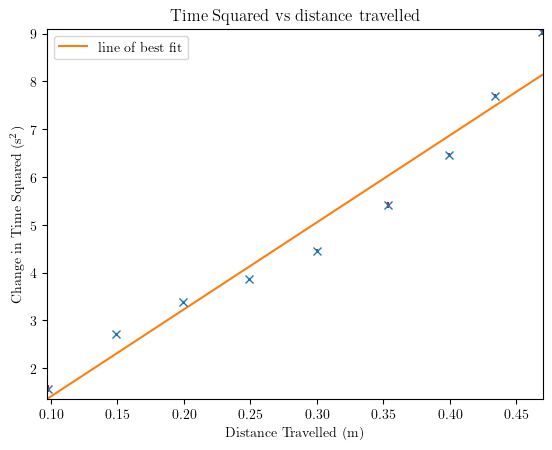

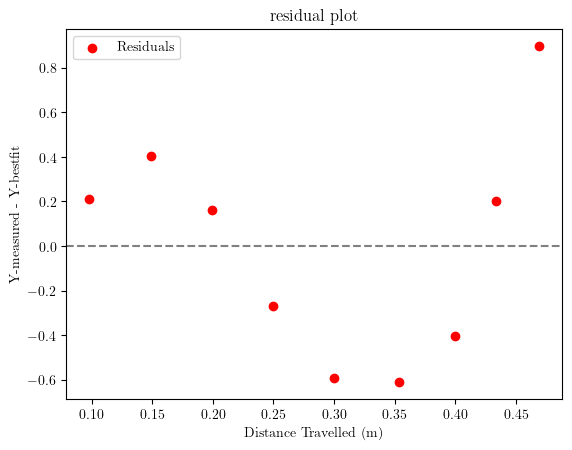

In [37]:
slope, intercept = np.polyfit(delta_x, time_squared, 1)
x_best_fit = np.linspace(min(delta_x), max(delta_x), 100)
y_best_fit = intercept + x_best_fit * slope

plt.rc('font', family = 'serif', serif = ['Computer Modern'])
plt.rcParams['text.usetex'] = True

plt.errorbar(delta_x, time_squared, xerr = 0.0005, yerr = standard_error_time_squared, fmt= "x", ecolor = "red")
plt.plot(x_best_fit, y_best_fit, label = "line of best fit")
plt.xlabel("Distance Travelled (m)")
plt.ylabel("Change in Time Squared (s$^2$)")
plt.title("Time Squared vs distance travelled")
print(f"The slope is: {slope:.5f} and the intercept is: {intercept:.4f}")
plt.legend()
plt.margins(x=0, y = 0)
plt.show()

residuals = np.array(time_squared) - (intercept + np.array(delta_x) * slope)

# Plot residuals
plt.scatter(delta_x, residuals, color='red', label='Residuals')

# Add a horizontal line at zero (indicating no residuals)
plt.axhline(0, color='gray', linestyle='--')

# Labels and legend
plt.xlabel('Distance Travelled (m)')
plt.ylabel('Y-measured - Y-bestfit')
plt.legend()
plt.title("residual plot")
plt.show()


Notice we seen a clear sinusodal trend in our residual plot. This indicates a systematic error which is reinforced by the absence of our error bars crossing the line of best fit (yes they are there, just very small). However, we have reviewed our error calculations and have come to the conclusion that they are correct. That leaves a question begging to be answered, namely, what is causing this sinusodal trend in our residual plot? We discussed a few possible reasons for this effect, but the one we are most confident is: a non-uniform density of the cylinder (ie. mass is not evenely distributed). This non-uniform distribution of mass would cause a constantly changing acceleration; this is due to the center of mass not being in the center of the cylinder. Consequently, the cylinder has intervals of its rotation where the excess mass is aiding in rotating (when the center of mass is moving downwards), and intervals of its rotation where the excess mass is opposing rotation (when the center of mass is moving upwards). This would cause our line of best fit to be overestimating the time taken for a specific displacement to be traversed when the cylinder's center of mass spent more time opposing roation, and underestiming the time taken when the cylinder's center of mass spent more time aiding rotation. Now that we have convicned ourselves that this is a pluasible explanation, what evidence do we have that this may be the exact explanation? A strong indicatator of this explanation is that the period of the sine wave is 42.5 cm. This number may seem random, but since the radius of the cylinder is around 7.6cm (obtained from Mr. Ruffolo), the circumference is around 47.5cm. The circumference and the period being in agreement suggest that this trend repeats after one full revoltuion (which is predicted by our hypothesis). Unfortunately, since we were not expecting this sinusodal trend we did not take the measurements to provide further support of this hypothesis. Although, given more time/resources, to further investigate this hypothesis we could attempt to isolate which interval of rotation aids motion, and which opposes. We would then mark the cylinder accordingly, and then test if these intervals still aid/oppose motion when expected given different enviornments (ie. different ramp, angle of inclination, etc.).  We could also test longer displacements to see if this trend continous indefintly. All in all, this is a very curious explanation, and one which needs a bit more testing before it can be verfified.